In [1]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
model_folder = 'C:/Users\lukec\PycharmProjects\emissions-tracking-conda\emissions-tracking\models/'

In [3]:
petro_cols = ['PRODUCT', 'COUNTRY/TERRITORY', 'COMPANY', 'ROUTE', 'TECHNOLOGY', 'SITE', 'COMPLEX', 'LICENSOR', '#', 'START_YR', 'LATITUDE', 'LONGITUDE', 'END_YR', 'Year', 'Age']
unfccc_cols = ['Party', 'Category', 'Year']
ct_cols = ['iso3_country', 'original_inventory_sector', 'asset_name', 'asset_type', 'asset_id', 'capacity', 'LONGITUDE', 'LATITUDE', 'Timestep']

In [4]:
petro_cols = ['Product', 'Country', 'Company', 'Route', 'Technology', 'Site', 'Complex', 'Licensor', 'Plant #', 'Start year', 'Latitude', 'Longitude', 'End year', 'Timestep', 'Age']
unfccc_cols = ['Party', 'Category', 'Timestep']
ct_cols = ['Longitude', 'Latitude', 'Timestep','Country', 'Sector', 'Name', 'Type', 'ID', 'Capacity']
remove_cols = [False, ['Name', 'ID'], ['Age']]

## Confusion plot

In [5]:
def plot_confusion(conf_mat, ax=False):
    if ax is False:
        fig, ax = plt.subplots(1,1,figsize=[6,6], facecolor='white')
    ax.imshow(conf_mat, interpolation='nearest')
    classes = range(len(conf_mat))
    ax.set_xticks(range(len(classes))), ax.set_xticklabels(classes, fontsize=15), ax.set_yticks(range(len(classes))), ax.set_yticklabels(classes, fontsize=15)
    ax.set_xlabel('Predicted Class',fontsize=15), ax.set_ylabel('True Class',fontsize=15)
    ax.set_title('Confusion Matrix',fontsize=17)
    for i in range(len(classes)):
        for j in range(len(classes)): text = ax.text(j, i, conf_mat[i, j], ha="center", va="center", color="r", fontsize=11)

def plot_sklearn_rank(model, columns, ax=False, dataset='Dataset', remove_cols=False):
    if ax is False:
        fig, ax = plt.subplots(1,1,figsize=[6,6], facecolor='white')
    ordered = pd.DataFrame([list(model.feature_importances_), columns]).transpose().sort_values(0, ascending=True)

    if remove_cols:
        ordered = ordered[[i not in remove_cols for i in ordered[1]]]

    ranked = ordered.reset_index(drop=True).reset_index().rename(columns={'index':'Rank', 0:'Feature importance', 1:'Feature'})
    ranked['Rank'] = ranked['Rank'].sort_index(ascending=False).values+1
    ranked.plot.barh(x='Feature', y='Feature importance', ax=ax, legend=False)
    ax.set_xlabel('Feature importance',fontsize=15), ax.set_ylabel(None)
    ax.set_title(dataset,fontsize=15)
    return ranked

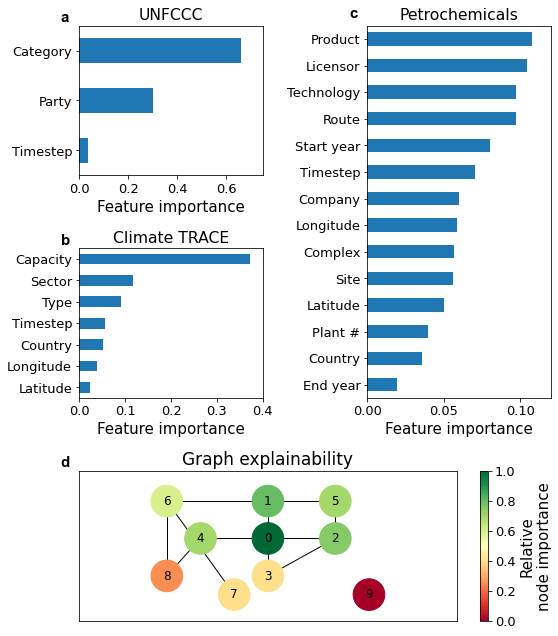

In [63]:
fig = plt.figure(figsize=[8,12], facecolor='white')
fontsize = 13
plt.rcParams.update({'font.size': fontsize})

titles = ['UNFCCC', 'Climate TRACE', 'Petrochemicals']#
x_lims = [0.75, 0.4, 0.12]
for num, (dataset, columns, title, rm_col, x_lim) in enumerate(zip(['UNFCCC', 'CT_manufacturing', 'petrochemicals'], [unfccc_cols, ct_cols, petro_cols], titles, remove_cols, x_lims)):
#    scores = np.load(model_folder+dataset+score_filename, allow_pickle=True).item()
    s_model = joblib.load(model_folder+dataset+'/clf_randomForestClassifier-n50_l2_split3_230530.joblib')
    s_score = np.load(model_folder+dataset+'/clf_randomForestClassifier-n50_l2_split3_230530.npy', allow_pickle=True).item()
    #X_train, X_test = [pd.DataFrame(np.load(model_folder+dataset+'/'+file+'.npy')) for file in ['X_train', 'X_test']]
    if num == 0:
        ax = fig.add_subplot(4,2,1)
    elif num == 1:
        ax = fig.add_subplot(4,2,3)
    else: ax = fig.add_subplot(4,2,(2,4))

    # X_train, X_test, y_train_values, y_train_cats, y_test_values, y_test_cats = [np.load(model_folder+dataset+'/'+file+'.npy') for file in ['X_train', 'X_test', 'y_train_values', 'y_train_cats', 'y_test_values', 'y_test_cats']]

    # cols_dict = {}
    # for number in range(0, 14):
    #     cols_dict[number] = petro_cols[number]

    #X_train.columns = columns
    ranked = plot_sklearn_rank(s_model, columns, ax, dataset, remove_cols=rm_col)

    w, h = -0.1, 1.05 if num==2 else 1.1
    letters = ['a', 'b', 'c']
    ax.text(w, h, letters[num], transform = ax.transAxes, fontsize=fontsize+2, fontweight = 'bold', color = 'black', va='top', ha='left', **{'fontname':'Arial'})
    ax.set_xlim([0, x_lim])
    ax.set_title(title)# +' - '+ str(s_score['average_acc'])[:4])

axg = fig.add_subplot(4,2,(5,6))
# axg.axis('off')
# Let's draw it again
#nx.draw(G, pos=pos, node_size=1500, with_labels=True, node_color=priors, cmap=cmap, ax=axg)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = 0, vmax=1))
c = plt.colorbar(sm)
c.set_label('Relative\nnode importance', fontsize=fontsize+2)

nx.draw(G, pos=pos, node_size=1000, with_labels=True, node_color=priors, cmap=cmap, ax=axg)
axg.set_xlim([-0.7,0.7])
axg.set_ylim([-1.1,0.9])
axg.set_title('Graph explainability', fontsize=fontsize+4)
axg.text(-0.05, 1.1, 'd', transform = axg.transAxes, fontsize=fontsize+2, fontweight = 'bold', color = 'black', va='top', ha='left', **{'fontname':'Arial'})

tax = axg.twinx()
tax.set_yticks([])
fig.tight_layout()

In [64]:
fig.savefig('C:/Users\lukec\PycharmProjects\emissions-tracking-conda\emissions-tracking\outputs\GRL_for_IE/explainability.png', dpi=200)

(-1.1, 1.1)

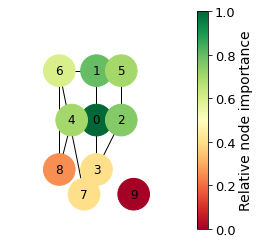

In [48]:
import networkx as nx
import random
fig, ax = plt.subplots(1,1,figsize=[4,4])

## Graph creation
nodes = 10 # Total number of nodes
zeros = 2 # Nodes in class 0
ones = 2 # Nodes in class 1
neighbours = 2 # Edges will be created to this number of nearest neighbours
cmap = 'RdYlGn' # No need to change unless you're fancying some groovy colours today

# Create a graph and add your nodes
G = nx.Graph() # Initialise the graph - nodes have got to go somewhere
G.add_nodes_from(range(nodes)) # Nodes going on
pos = nx.spring_layout(G) # Fix the positions of the nodes
G.add_edges_from([[0,1], [0,2], [0,3], [0,4], [1,5], [2,5], [1,6], [2,3], [6,8], [6,7], [8,4]])
priors = [1, 0.8, 0.75, 0.4, 0.7, 0.7, 0.6, 0.4, 0.25, 0]
sepy = 0.5
sepx = 0.25
pos = [[0,0], [0,sepy], [sepx, 0], [0, -sepy], [-sepx, 0], [sepx, sepy], [-1.5*sepx, 1*sepy], [-0.5*sepx, -1.5*sepy], [-1.5*sepx, -sepy], [1.5*sepx, -1.5*sepy]]
#nx.draw(G, pos=pos, node_size=1500, with_labels=False) # Let's have a look

# @title Allocate classes
"""
Good start, now let's add our prior knowledge.

We'll randomly assign which nodes are to be in classes 0 and 1, with the rest
being ignorant - i.e. 0.5 prior belief.
"""
# randomise_priors = False
# if randomise_priors:
#     priors = [1]*ones+[0]*zeros+[0.5]*(nodes-(ones+zeros))
#     np.random.shuffle(priors)
# else:
#     priors = random_numbers = [random.random() for _ in range(nodes)]

# Don't worry about these, it's just adding a colorbar to look pretty
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = 0, vmax=1))
c = plt.colorbar(sm)
c.set_label('Relative node importance', fontsize=14)

nx.draw(G, pos=pos, node_size=1000, with_labels=True, node_color=priors, cmap=cmap, ax=ax)
ax.set_xlim([-0.9,0.9])
ax.set_ylim([-1.1,1.1])

#ax.set_title('Graph explainability', fontsize=fontsize+4)

In [72]:
fig.savefig('C:/Users\lukec\PycharmProjects\emissions-tracking-conda\emissions-tracking\outputs\GRL_for_IE/explainability_only.png', dpi=200)

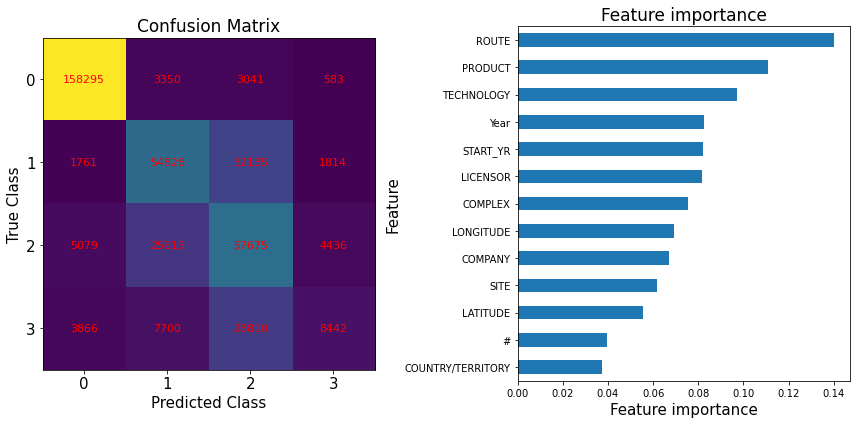

In [5]:
fig, axs = plt.subplots(1,2,figsize=[12,6], facecolor='white')
plot_confusion(scores['confusion'], ax=axs[0])
ranked = plot_sklearn_rank(s_model, X_train, axs[1])
fig.tight_layout()

In [44]:
fig.savefig('C:/Users\lukec\PycharmProjects\emissions-tracking-conda\emissions-tracking\outputs\GRL_for_IE/feature_importance.png')

## Feature importance

In [47]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(X_train_pp)
pca.explained_variance_ratio_

array([[-5.99526479e-02, -4.16420682e-01,  2.15720485e-01,
        -4.21239404e-02, -1.42553151e-01,  1.58877365e-01,
         2.47615544e-01, -4.62307527e-02, -9.40116892e-02,
         5.21238928e-01,  3.76920848e-01, -5.68701162e-02,
         4.89738532e-01],
       [-6.80868662e-01,  4.18784727e-02, -9.86321100e-02,
        -6.80310837e-01, -1.96918459e-01, -4.98393638e-02,
        -1.06849328e-01,  2.87081413e-02,  2.83901273e-02,
         1.31161278e-02, -9.46839844e-03,  7.73683141e-02,
        -3.94666123e-02],
       [-1.73005880e-02,  1.56622478e-01, -2.42756447e-01,
         1.68032619e-01, -5.68512943e-01, -1.44275677e-01,
         3.29649472e-01, -3.94052898e-03, -6.48238211e-01,
        -3.39978702e-02, -9.32919608e-02,  5.81187964e-02,
        -4.29869575e-02],
       [ 2.12412254e-02, -2.69418355e-02, -4.78742283e-01,
         2.57800175e-02,  1.14096546e-01, -6.52675304e-01,
         8.50144690e-03, -3.75655161e-02,  1.39370654e-01,
         2.09455966e-01,  3.49299500e

## PCA plot

In [5]:
import shap
import torch
import tensorflow
model = torch.load(model_folder+model_filename)

In [6]:
X_train, X_test, y_train_values, y_train_cats, y_test_values, y_test_cats = [pd.read_csv(model_folder+file+'.csv', index_col=0) for file in ['X_train', 'X_test', 'y_train_values', 'y_train_cats', 'y_test_values', 'y_test_cats']]

X_train_pp = np.load(model_folder+'X_train.npy')
X_test_pp = np.load(model_folder+'X_test.npy')

In [79]:
import torch_geometric

In [80]:
from importlib import reload
reload(torch_geometric)

ImportError: cannot import name 'FeatureStore' from 'torch_geometric.data' (C:\ProgramData\Anaconda3\envs\emissions-tracking-conda\lib\site-packages\torch_geometric\data\__init__.py)

In [27]:
np.array(list(s_model.feature_importances_), list(X_train.columns))

TypeError: Field elements must be 2- or 3-tuples, got ''PRODUCT''

In [22]:
X_train_pp

array([[-0.70021483,  1.00419216, -0.79943976, ...,  0.92490272,
         0.22538977,  1.08431961],
       [ 0.46420279,  1.00419216, -0.17664079, ...,  0.62290256,
         0.16941581,  1.05951773],
       [-0.01762519, -1.27681673,  0.43673282, ..., -0.83676489,
         1.34486903, -0.16817564],
       ...,
       [-1.30249981, -1.00846274,  0.97615357, ..., -0.33343129,
        -0.05448004,  0.78669698],
       [-0.61991017, -1.00846274,  1.01022989, ..., -0.28309793,
         0.28136373,  0.94790924],
       [-1.94493712,  1.20545765, -1.00099751, ..., -1.49109857,
        -0.50227175,  0.97271113]])

In [ ]:
from torch_geometric.explain

In [9]:
DEVICE = "cpu"
e = shap.DeepExplainer(
        model,
        torch.from_numpy(
            X_train_pp[np.random.choice(np.arange(len(X_train_pp)), 10000, replace=False)]
        ).to(DEVICE))

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


AssertionError: <class 'collections.OrderedDict'> is not currently a supported model type!

In [93]:
X_train, X_test, y_train_values, y_train_cats, y_test_values, y_test_cats = [pd.read_csv(model_folder+file+'.csv', index_col=0) for file in ['X_train', 'X_test', 'y_train_values', 'y_train_cats', 'y_test_values', 'y_test_cats']]

In [10]:
X_train

,PRODUCT,COUNTRY/TERRITORY,COMPANY,ROUTE,TECHNOLOGY,SITE,#,COMPLEX,LICENSOR,START_YR,Year,LATITUDE,LONGITUDE
0,EVA COPOLYMERS,SOUTH KOREA,HANWHA SOLUTIONS/CHEMICAL,VIRGIN RESIN,HP TUBULAR,ULSAN,2.0,0,DOW,2000,2038,125.0,309.0
1,PHTHALIC ANHYDRIDE,SOUTH KOREA,LG CHEM,O - XYLENE,OXIDATION,YEOSU,1.0,0,ATOCHEM,1992,2032,124.0,307.0
2,METHYL METHACRYLATES,BELARUS,POLYMIR,ACETONE CYANOHYDRIN,SYNTHESIS,NOVOPOLOTSK,1.0,n.a.,n.a.,1986,2003,145.0,208.0
3,ADIPIC ACID,GERMANY,BASF,CYCLOHEXANE,OXIDATION,LUDWIGSHAFEN,1.0,0,n.a.,1978,2010,139.0,188.0
4,LIGHT DISTILLATES DESULF,ITALY,RAFFINERIA DI GELA,HYDRODESULF-NAPHTHA,UNIVERSAL OIL PRODUCTS CO,GELA,1.0,n.a.,n.a.,1969,2023,127.0,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
924664,LLDPE,OMAN,OQ,VIRGIN RESIN,PE GAS PHASE,SOHAR,2.0,0,UNIPOL (UCC),2021,2030,114.0,236.0
924665,ETHYLENE GLYCOLS,INDIA,RELIANCE IND.,ETHYLENE OXIDE,HYDRATION,HAZIRA,2.0,0,SHELL,1997,2014,111.0,252.0
924666,CATALYTIC CRACKING,CHINA,SICHUAN SHENGMA CHEMICAL INDUSTRY,FLUID CAT-CRACKING,n.a.,SUINING,1.0,n.a.,n.a.,2004,2013,120.0,285.0
924667,HDPE,CHINA,SINOPEC QILU PC,VIRGIN RESIN,PE GAS PHASE,ZIBO,4.0,0,SINOPEC,2013,2014,126.0,298.0


In [11]:
X_train_pp

array([[-0.70021483,  1.00419216, -0.79943976, ...,  0.92490272,
         0.22538977,  1.08431961],
       [ 0.46420279,  1.00419216, -0.17664079, ...,  0.62290256,
         0.16941581,  1.05951773],
       [-0.01762519, -1.27681673,  0.43673282, ..., -0.83676489,
         1.34486903, -0.16817564],
       ...,
       [-1.30249981, -1.00846274,  0.97615357, ..., -0.33343129,
        -0.05448004,  0.78669698],
       [-0.61991017, -1.00846274,  1.01022989, ..., -0.28309793,
         0.28136373,  0.94790924],
       [-1.94493712,  1.20545765, -1.00099751, ..., -1.49109857,
        -0.50227175,  0.97271113]])

In [79]:
y_pred = model.predict(X_train_pp)

In [84]:
metrics(y_pred, y_train_cats)

{'confusion': array([[382892,     87,    194,    466],
        [    74, 209996,    650,    302],
        [   194,    545, 212999,    852],
        [   440,    289,    792, 113897]], dtype=int64),
 'overall_acc': 0.9947170284718099,
 'average_acc': 0.9931496197459517,
 'kappa': 0.9925208838369026,
 'IoU': 0.9895195292343649}

In [98]:
merged = pd.merge(X_test, X_test.drop_duplicates(subset=list(X_train.columns[:6])), on=list(X_train.columns[:6]), how='left', suffixes=('', '_y'))

,PRODUCT,COUNTRY/TERRITORY,COMPANY,ROUTE,TECHNOLOGY,LICENSOR
0,EVA COPOLYMERS,SOUTH KOREA,HANWHA SOLUTIONS/CHEMICAL,VIRGIN RESIN,HP TUBULAR,DOW
1,PHTHALIC ANHYDRIDE,SOUTH KOREA,LG CHEM,O - XYLENE,OXIDATION,ATOCHEM
2,METHYL METHACRYLATES,BELARUS,POLYMIR,ACETONE CYANOHYDRIN,SYNTHESIS,n.a.
3,ADIPIC ACID,GERMANY,BASF,CYCLOHEXANE,OXIDATION,n.a.
4,LIGHT DISTILLATES DESULF,ITALY,RAFFINERIA DI GELA,HYDRODESULF-NAPHTHA,UNIVERSAL OIL PRODUCTS CO,n.a.
...,...,...,...,...,...,...
881457,ACRYLONITRILE,SPAIN,PAULAR,PROPYLENE,AMMOXIDATION,MONTEDISON
882298,PROPYLENE GLYCOLS,CANADA,DOW CHEMICAL,PROPYLENE OXIDE,n.a.,n.a.
888971,ETHYLENE,GERMANY,ERDOELCHEMIE,STEAM-CRACKING,STEAM CRACKING,STONE & WEBSTER
904034,POLYESTER FIBRES,UNITED STATES,DOW BADISCHE,PES POLYMER,n.a.,n.a.


In [80]:
import sklearn.metrics as skm

def metrics(y_true, y_pred, model_type='clf'):
    if model_type == 'clf':
        metric_dict = {'confusion': skm.confusion_matrix(y_true, y_pred),
                       'overall_acc': skm.accuracy_score(y_true, y_pred),
                       'average_acc': skm.balanced_accuracy_score(y_true, y_pred),
                       'kappa': skm.cohen_kappa_score(y_true, y_pred),
                       'IoU': skm.jaccard_score(y_true, y_pred, average='weighted')}
    elif model_type == 'reg':
        metric_dict = {'r2': skm.r2_score(y_true, y_pred),
                       'mae': skm.mean_absolute_error(y_true, y_pred),
                       'mse': skm.mean_squared_error(y_true, y_pred)}

    else: raise 'Incorrect model type'

    return metric_dict

In [82]:
y_train_cats

,Category
